In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

import numpy as np
import pylab as pl

from exactcover import *
import os
from matplotlib import rc
font = {'size' : 16}
rc('font', **font);
rc('text', usetex=True)

import sys
sys.path.append('../')

from qiskit_utilities.utilities import *


In [4]:
FR = np.zeros((3,4))
FR[0,0]=1
FR[1,0]=1
FR[2,1]=1
FR[1,1]=0
FR[0,2]=1
FR[1,3]=1
FR

array([[1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [191]:
CR = np.array([0.5,0.1,0.1,0.1])
#CR /= np.sum(CR)
CR

array([0.4, 0.1, 0.1, 0.1])

In [192]:
# FR = np.zeros((2,2))
# FR[0,0]=1
# FR[1,0]=1
# FR[0,1]=1
# FR

In [193]:
options={}
options['FR']=FR
options['CR']=CR
options['usebarrier']=True
circ=createCircuit_ExactCover(np.array((0.1,0.2)), 1, options)
circ.draw()

┌───┐┌───────────┐                       ░                        ░ »
q336297_0: ┤ H ├┤ RZ(0.008) ├──■────────────────■───░───■────────────────■───░─»
           ├───┤└───────────┘  │                │   ░   │                │   ░ »
q336297_1: ┤ H ├───────────────┼────────────────┼───░───┼────────────────┼───░─»
           ├───┤             ┌─┴─┐┌──────────┐┌─┴─┐ ░   │                │   ░ »
q336297_2: ┤ H ├─────────────┤ X ├┤ RZ(0.05) ├┤ X ├─░───┼────────────────┼───░─»
           ├───┤             └───┘└──────────┘└───┘ ░ ┌─┴─┐┌──────────┐┌─┴─┐ ░ »
q336297_3: ┤ H ├────────────────────────────────────░─┤ X ├┤ RZ(0.05) ├┤ X ├─░─»
           └───┘                                    ░ └───┘└──────────┘└───┘ ░ »
 c48057: 4/════════════════════════════════════════════════════════════════════»
                                                                               »
«             ┌──────────┐              ░ ┌─┐         
«q336297_0: ──┤ RX(-0.4) ├──────────────░─┤M├─────────
«           ┌─┴──────────┴┐┌──────────┐ ░ └╥┘┌─┐      
«q336297_1: ┤ RZ(-0.0495) ├┤ RX(-0.4) ├─░──╫─┤M├──────
«           └┬────────────┤├──────────┤ ░  ║ └╥┘┌─┐   
«q336297_2: ─┤ RZ(0.0005) ├┤ RX(-0.4) ├─░──╫──╫─┤M├───
«            ├────────────┤├──────────┤ ░  ║  ║ └╥┘┌─┐
«q336297_3: ─┤ RZ(0.0005) ├┤ RX(-0.4) ├─░──╫──╫──╫─┤M├
«            └────────────┘└──────────┘ ░  ║  ║  ║ └╥┘
« c48057: 4/═══════════════════════════════╩══╩══╩══╩═
«                                          0  1  2  3

In [194]:
from qaoa import *
Aer.backends()
backend = Aer.get_backend('qasm_simulator')

In [195]:
beta_n = 20
gamma_n = 40
beta_max = np.pi
gamma_max = 2*np.pi
optmethod='Nelder-Mead'        
shots=1024*2*2*2
rerun=True
maxdepth=4

Elandscape, gammabetas, E, best =  runQAOA(createCircuit_ExactCover, measurementStatistics_ExactCover, backend, gamma_n, beta_n, gamma_max, beta_max, optmethod=optmethod, shots=shots, rerun=rerun, maxdepth=maxdepth, options=options)

depth = 1
Calculating Energy landscape...
Calculating Energy landscape done
depth = 1 rep = 0
Optimization terminated successfully.
         Current function value: 0.606403
         Iterations: 13
         Function evaluations: 28
depth = 1 rep = 1
Optimization terminated successfully.
         Current function value: 0.608618
         Iterations: 10
         Function evaluations: 27
depth = 1 rep = 2
Optimization terminated successfully.
         Current function value: 0.605283
         Iterations: 11
         Function evaluations: 29
depth = 1 rep = 3
Optimization terminated successfully.
         Current function value: 0.607234
         Iterations: 9
         Function evaluations: 25
depth = 1 rep = 4
Optimization terminated successfully.
         Current function value: 0.616075
         Iterations: 11
         Function evaluations: 26
depth = 2
depth = 2 rep = 0
Optimization terminated successfully.
         Current function value: 0.604421
         Iterations: 41
         Func

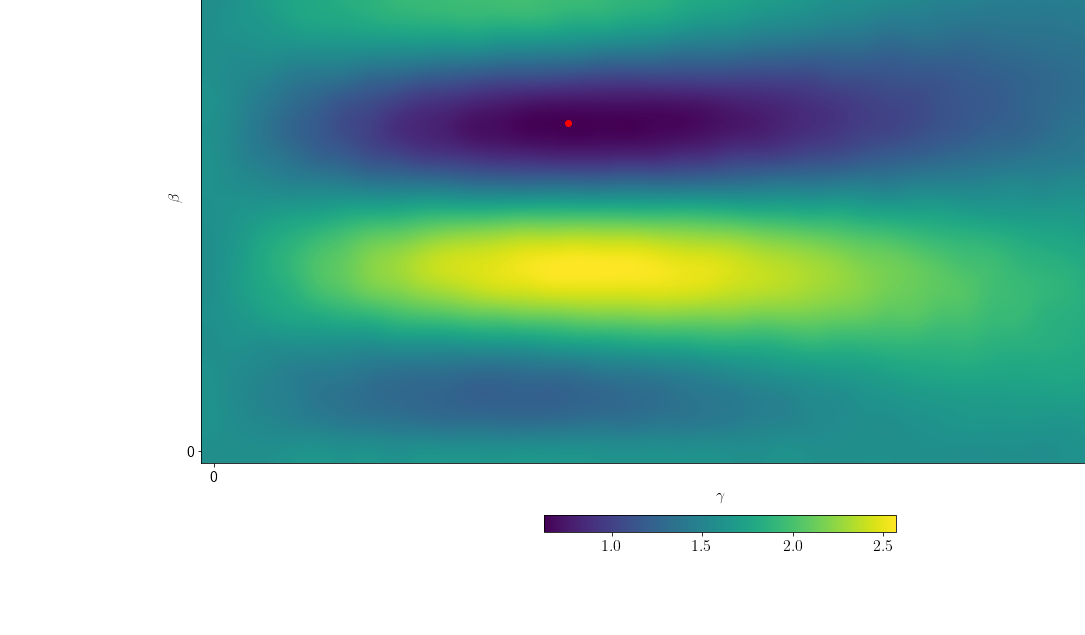

In [196]:
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable

shiftg=gamma_max/(2*gamma_n)
shiftb=beta_max/(2*beta_n)

pl.figure(figsize=(20,10));
pl.clf()
pl.imshow(Elandscape,interpolation='spline36',origin='lower'
            ,extent=[-shiftg,gamma_max+shiftg,-shiftb,beta_max+shiftb], aspect=1)
pl.xticks([0,gamma_max], ['0', r'$2\pi$'])
pl.yticks([0,beta_max], ['0', r'$\pi$'])
pl.xlabel('$\gamma$',loc='center')
pl.ylabel(r'$\beta$',loc='center')
pl.colorbar(shrink=0.25, pad=0.075, orientation="horizontal")
pl.plot(gammabetas['xL_d1'][0], gammabetas['xL_d1'][1],'or')

pl.tight_layout()


In [197]:
circuit = createCircuit_ExactCover(gammabetas['xL_d1'], 1, options = options)
job = execute(circuit, backend, shots=shots)

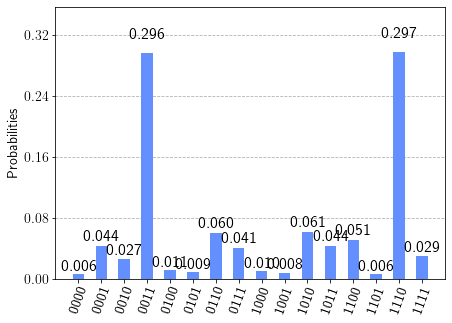

In [198]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().get_counts())

In [199]:
circuit = createCircuit_ExactCover(gammabetas['xL_d4'], 4, options = options)
job = execute(circuit, backend, shots=shots)

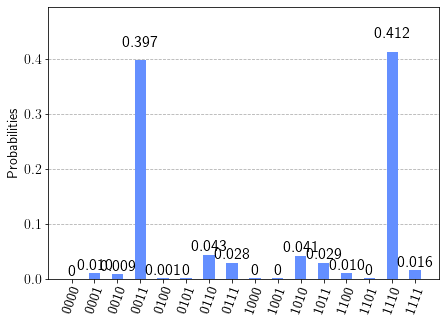

In [200]:
plot_histogram(job.result().get_counts())